#Vesuvius Scroll Challenge - Letter Grid

This tool is meant to assist in letter or character detection.

User can input chracters into each cell which then updates dynamically for each instance of that symbol.

So if you decide that an epsilon should actually be a theta, you can update all instances of that symbol. Click on 'Copy' to print the row or entire grid to output which you can then paste into othe Greek word detector.

Currently the grid is prepopulated with the characters from the first ink/letters section of Scroll 1.

(3)          δεικνΥοντΑι  ημινοε
(4)       πι  τε πορφΥρ  Ας κΑι  π
(5)       των   ομ οιων       κΑ	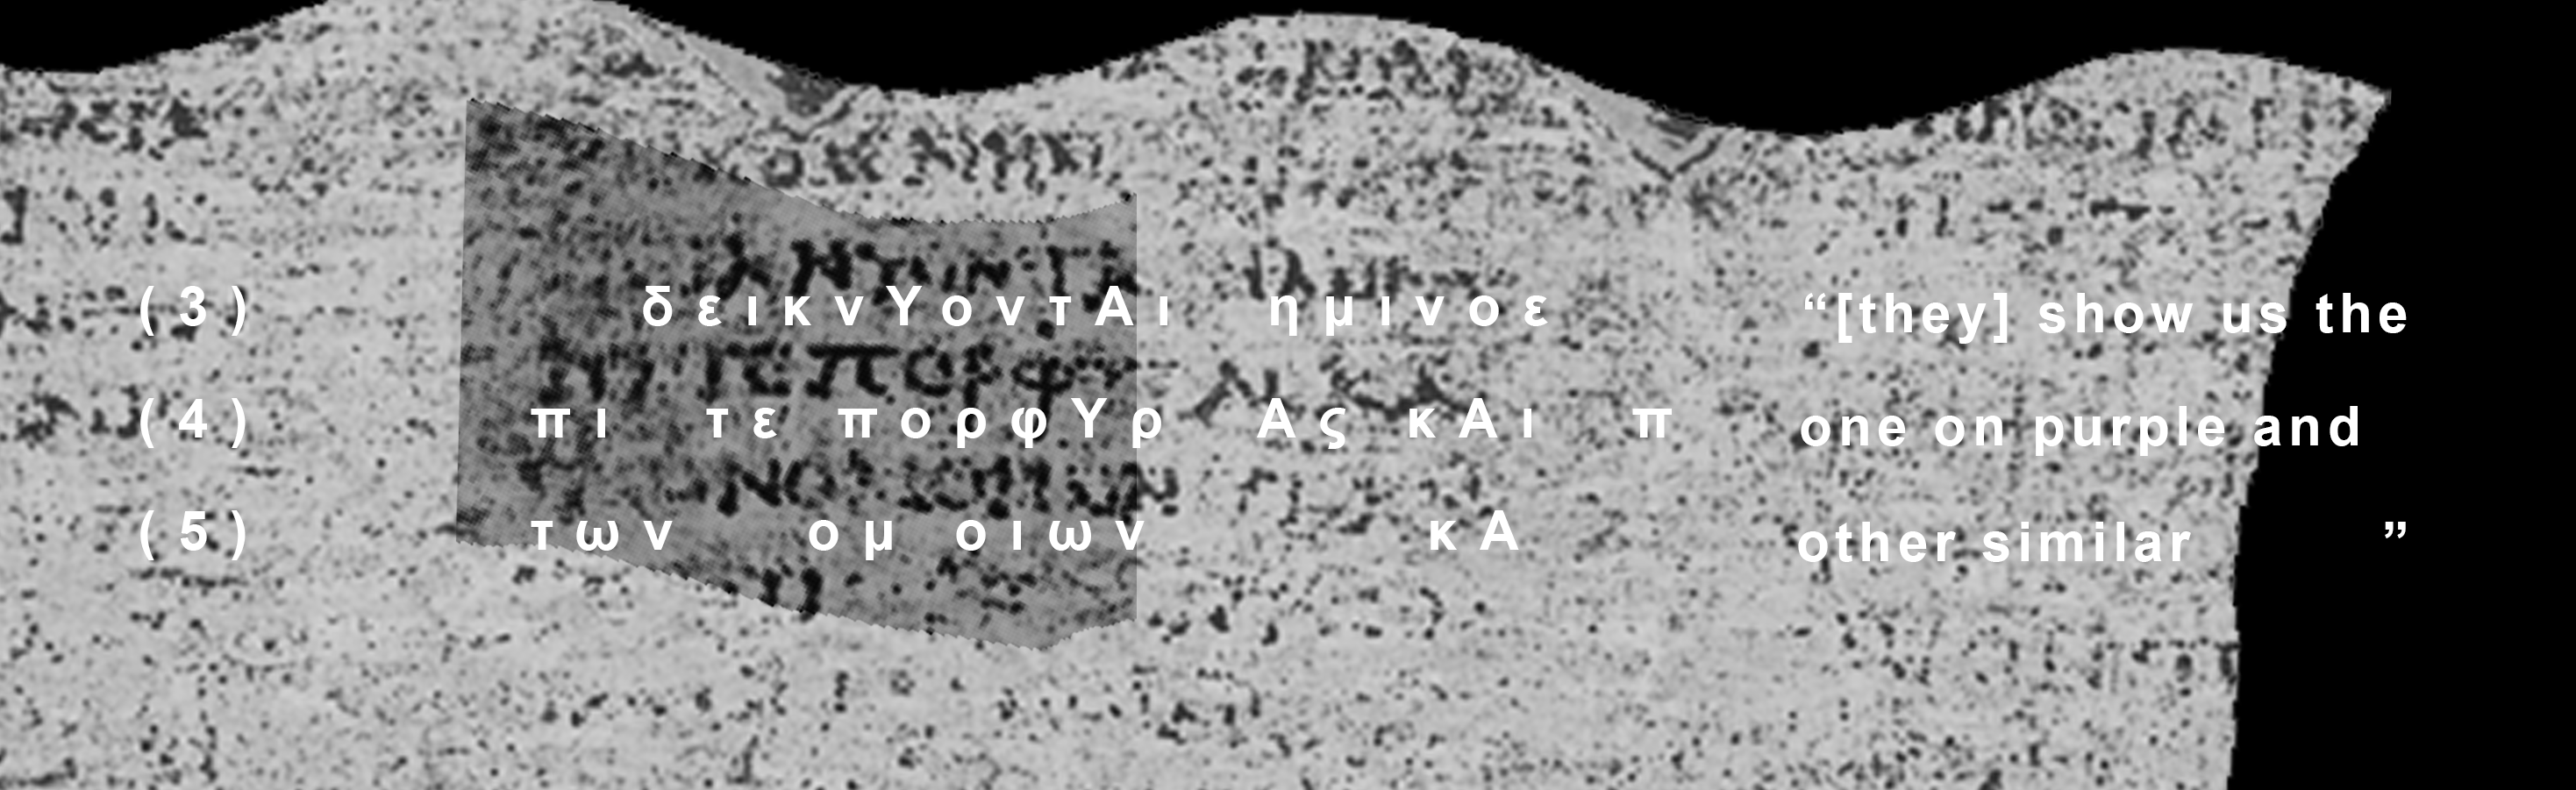

#Letter Grid


In [ ]:
# @title
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

class GreekGrid:
    def __init__(self, size=12, box_width='40px'):
        self.size = size
        input_text = "δεικνυονται ημιν ο ε πι τε πορφυρας και των ομοιων"
        self.grid = np.array([[widgets.Text(value=input_text[i*size + j] if i*size + j < len(input_text) else '',
                                            layout=widgets.Layout(width=box_width)) for j in range(size)] for i in range(size)])
        self.copy_buttons = [widgets.Button(description='Copy', layout=widgets.Layout(width='60px')) for _ in range(size)]
        for i in range(size):
            self.copy_buttons[i].on_click(self.create_on_copy_clicked(i))
            for j in range(size):
                self.grid[i, j].observe(self.on_change, names='value')

    def create_on_copy_clicked(self, row):
        def on_copy_clicked(b):
            row_data = ''.join([self.grid[row, j].value for j in range(self.size)])
            with output:
                clear_output()
                print(f"Row {row + 1} contents: {row_data}")
        return on_copy_clicked

    def on_change(self, change):
        old_value = change['old']
        new_value = change['new']
        # Update all instances of the old value
        for i in range(self.size):
            for j in range(self.size):
                if self.grid[i, j].value == old_value:
                    self.grid[i, j].value = new_value

    def on_copy_all_clicked(self, b):
        all_data = '\n'.join([''.join([self.grid[i, j].value for j in range(self.size)]) for i in range(self.size)])
        with output:
            clear_output()
            print(f"All data:\n{all_data}")

    def display(self):
        global output
        output = widgets.Output()
        grid_box = widgets.VBox([widgets.HBox([self.copy_buttons[i]] + [self.grid[i, j] for j in range(self.size)]) for i in range(self.size)])
        copy_all_button = widgets.Button(description="Copy All")
        copy_all_button.on_click(self.on_copy_all_clicked)
        display(grid_box)
        display(copy_all_button)
        display(output)

# Create a 12x12 Greek grid with copy buttons
greek_grid = GreekGrid(12, '40px')
greek_grid.display()


Button(description='Copy All', style=ButtonStyle())

Output()

#Greek word detector

In [ ]:
import re

def is_greek_word(word):
    # A regular expression that matches Greek characters
    greek_char_pattern = r"[\u0370-\u03FF\u1F00-\u1FFF]+"
    return bool(re.match(greek_char_pattern, word))

# Example usage
text = "δεικνυονται ημιν ο ε πι τε πορφυρας και των ομοιων"
words = text.split()

greek_words = [word for word in words if is_greek_word(word)]
print("Greek words detected:", greek_words)


Greek words detected: ['δεικνυονται', 'ημιν', 'ο', 'ε', 'πι', 'τε', 'πορφυρας', 'και', 'των', 'ομοιων']
